In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data courtesy of Kaggle: https://www.kaggle.com/datasets/drahulsingh/best-selling-books

In [74]:
#load data

df = pd.read_csv(r"C:\Users\bryan\Desktop\books.csv")
df.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


In [75]:
#see if there are any missing values

df.isnull().sum()

Book                              0
Author(s)                         0
Original language                 0
First published                   0
Approximate sales in millions     0
Genre                            56
dtype: int64

In [90]:
df.describe()

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


In [91]:
df.shape

(174, 6)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


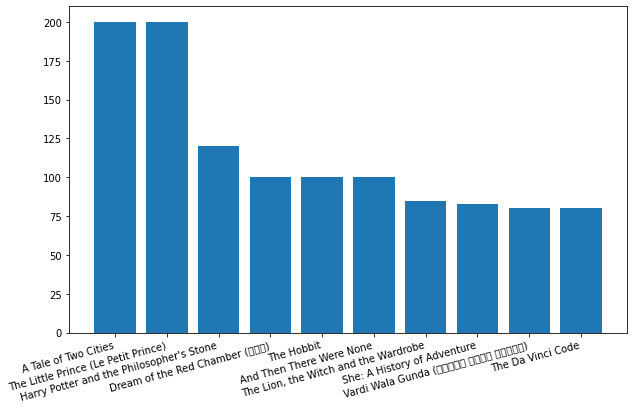

In [104]:
titles = df.sort_values(by='Approximate sales in millions', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(titles['Book'], titles['Approximate sales in millions'])
plt.xticks(rotation=15, ha='right');

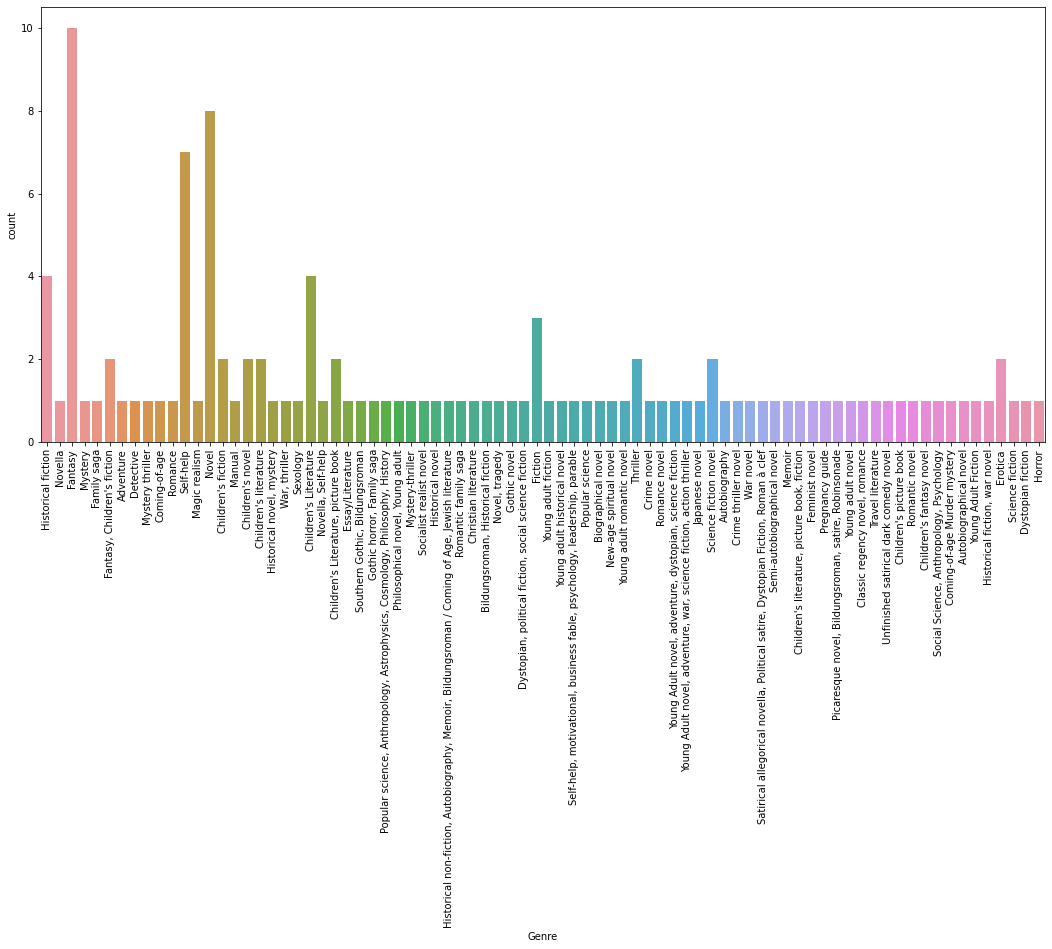

In [40]:
#plot genre count

plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='Genre')
plt.xticks(rotation=90)
plt.show()

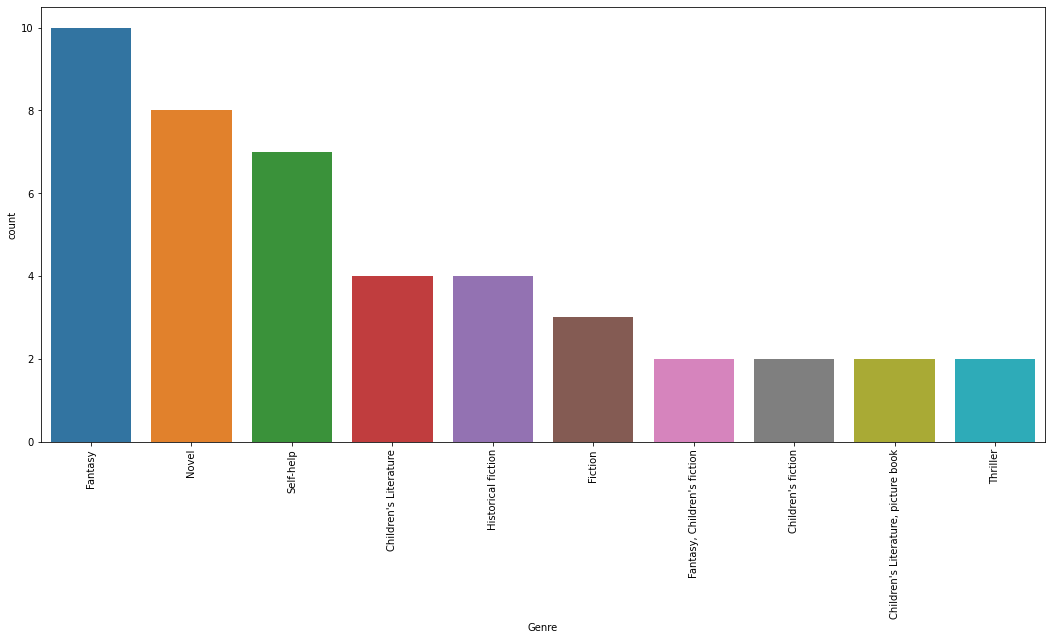

In [37]:
#determine the top 10 genres

top_genres = df['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Genre'].isin(top_genres.index)], x='Genre', order=top_genres.index)
plt.xticks(rotation=90)
plt.show()

In [76]:
#determine titles for the Fantasy genre

df[df['Genre'] == 'Fantasy']['Book']

2      Harry Potter and the Philosopher's Stone
5                                    The Hobbit
10      Harry Potter and the Chamber of Secrets
11     Harry Potter and the Prisoner of Azkaban
12          Harry Potter and the Goblet of Fire
13    Harry Potter and the Order of the Phoenix
14       Harry Potter and the Half-Blood Prince
15         Harry Potter and the Deathly Hallows
16                 The Alchemist (O Alquimista)
29                               Watership Down
Name: Book, dtype: object

In [77]:
#determine titles for the novel genre

df[df['Genre'] == 'Novel']['Book']

22                                    Lolita
32                            The Ginger Man
42                             Kane and Abel
51                       Valley of the Dolls
66                          Paul et Virginie
70    Virgin Soil Upturned (Поднятая целина)
74                                 The Shack
86                        Things Fall Apart 
Name: Book, dtype: object

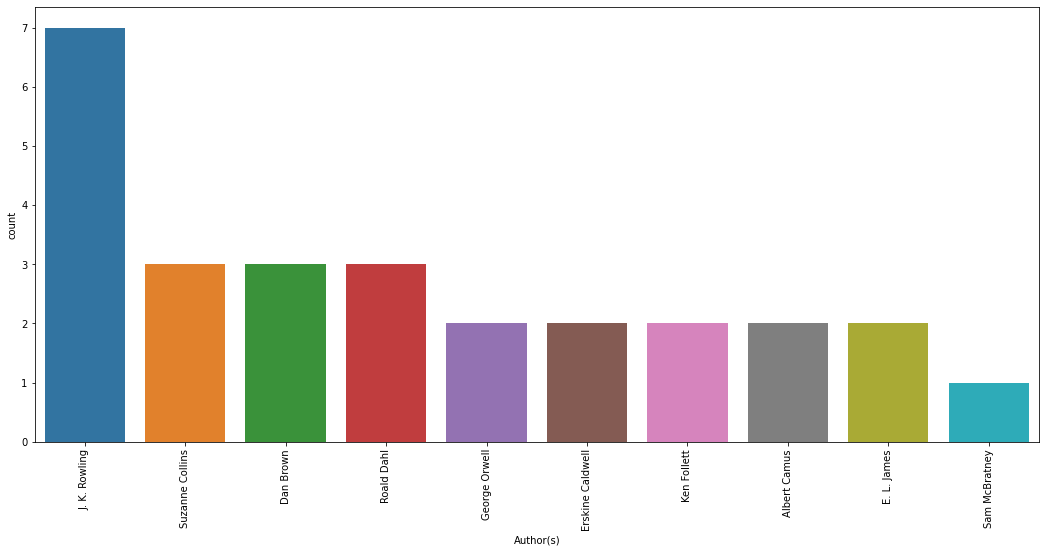

In [39]:
#Determine authors with the most books on the best seller list

top_authors = df['Author(s)'].value_counts().head(10)
top_authors = top_authors.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Author(s)'].isin(top_authors.index)], x='Author(s)', order=top_authors.index)
plt.xticks(rotation=90)
plt.show()

In [70]:
#determine titels for J.K. Rowling's books

df[df['Author(s)'] == 'J. K. Rowling']['Book']

2      Harry Potter and the Philosopher's Stone
10      Harry Potter and the Chamber of Secrets
11     Harry Potter and the Prisoner of Azkaban
12          Harry Potter and the Goblet of Fire
13    Harry Potter and the Order of the Phoenix
14       Harry Potter and the Half-Blood Prince
15         Harry Potter and the Deathly Hallows
Name: Book, dtype: object

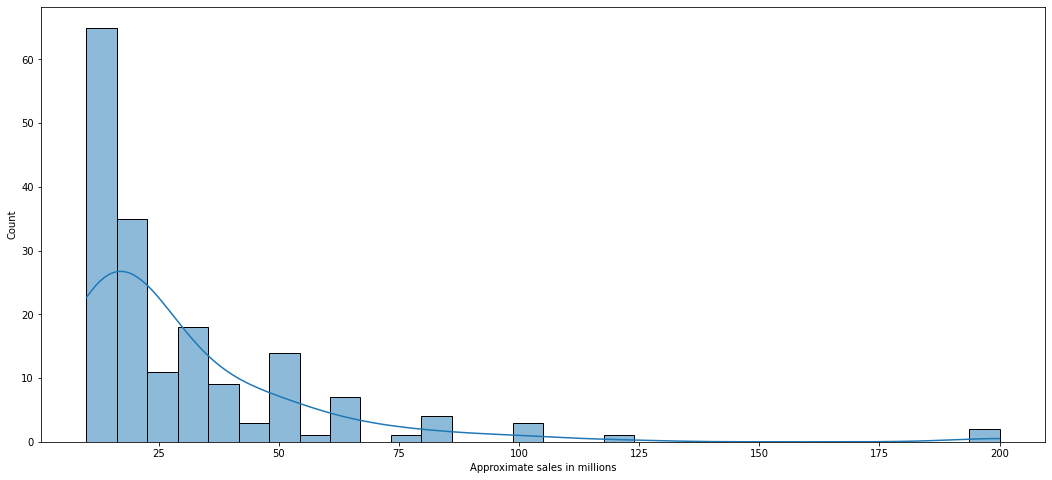

In [60]:
#Plot the sales in millions

plt.figure(figsize=(18, 8))
sns.histplot(data=df, x='Approximate sales in millions', bins=30, kde=True)
plt.show()

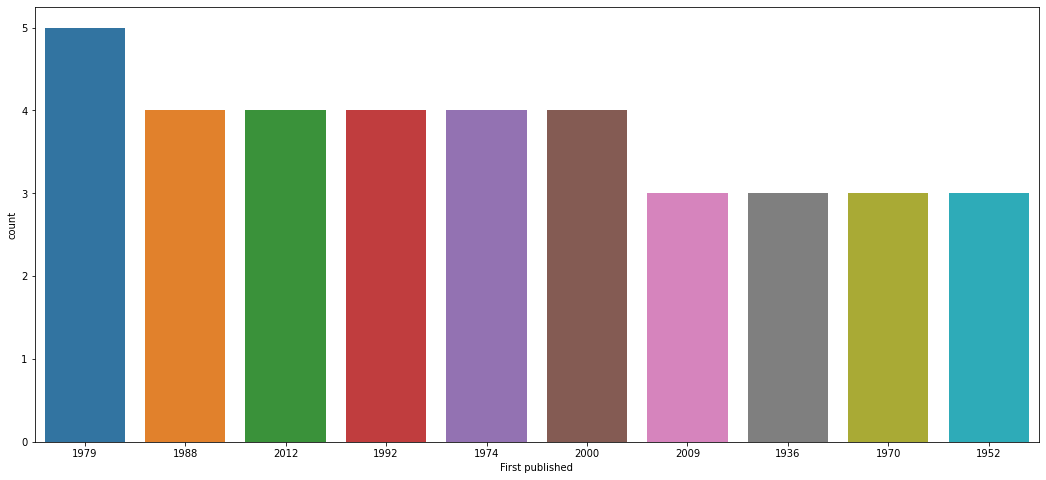

In [61]:
#determine the top 10 years with the most bestsellers

top_years = df['First published'].value_counts().head(10)
top_years = top_years.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['First published'].isin(top_years.index)], x='First published', order = top_years.index)
plt.xticks(rotation=0)
plt.show()

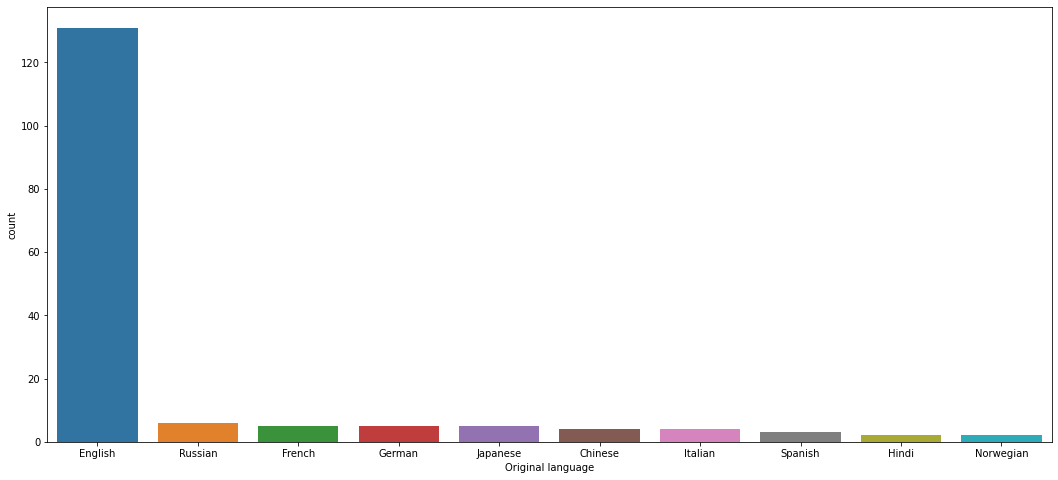

In [95]:
#top language

top_language = df['Original language'].value_counts().head(10)
top_language = top_years.sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Original language'].isin(top_language.index)], x='Original language', order = top_language.index)
plt.xticks(rotation=0)
plt.show()

In [68]:
#what are the bestseller titles in 1979?

df[df['First published'] == 1979]['Book']

38                                  Flowers in the Attic
42                                         Kane and Abel
112    The Neverending Story (Die unendliche Geschichte)
125                 The Hitchhiker's Guide to the Galaxy
161    Problems in China's Socialist Economy (中国社会主义经...
Name: Book, dtype: object

In [78]:
#what are the bestseller titles in 1988?

df[df['First published'] == 1988]['Book']

16     The Alchemist (O Alquimista)
65          A Brief History of Time
80                   Kitchen (キッチン)
108                         Matilda
Name: Book, dtype: object

In [80]:
years_to_select = [1988, 2012, 1992, 1974, 2000]
df[df['First published'].isin(years_to_select)]['Book']

8      Vardi Wala Gunda (वर्दी वाला गुंडा)
12     Harry Potter and the Goblet of Fire
16            The Alchemist (O Alquimista)
18           The Bridges of Madison County
41                         Angels & Demons
65                 A Brief History of Time
72                  The Fault in Our Stars
80                          Kitchen (キッチン)
83                               Gone Girl
85                    The Bermuda Triangle
90                                    Jaws
108                                Matilda
123                Interpreter of Maladies
135                          Me Before You
145                    Fifty Shades Darker
149                  Diana: Her True Story
155                             Wild Swans
159                        The Total Woman
163                         The Dukan Diet
168                       The Front Runner
Name: Book, dtype: object

In [86]:
#most popular genres in 1979

df[df['First published'] == 1979]['Genre']

38     Gothic horror, Family saga
42                          Novel
112         Children's Literature
125               Science fiction
161                           NaN
Name: Genre, dtype: object

In [87]:
#most popular genres in 1988

df[df['First published'] == 1988]['Genre']

16                   Fantasy
65           Popular science
80            Japanese novel
108    Children's Literature
Name: Genre, dtype: object

In [88]:
#most popular genres in 1952

df[df['First published'] == 1952]['Genre']

31     Children's fiction
100             Self-help
131                   NaN
Name: Genre, dtype: object

# Findings

1. the most popular genre is Fantasy
2. The most popular anguage is English
3. The best year for bestsellers was 1979
4. J.K. Rowling has the most sales as a single author
5. Fantasy may be overrepresented due to the popularity of Rowling's Harry Potter series

In [113]:
#for finding 5, let's remove Harry Potter from the dataset to see if Fantasy remains the best represented genre amongst bestsellers

df2 = df.drop(df[df['Author(s)'] == 'J.K. Rowling'].index)

In [114]:
df2 = df.drop(df[df['Book'].str.contains('Potter')].index)

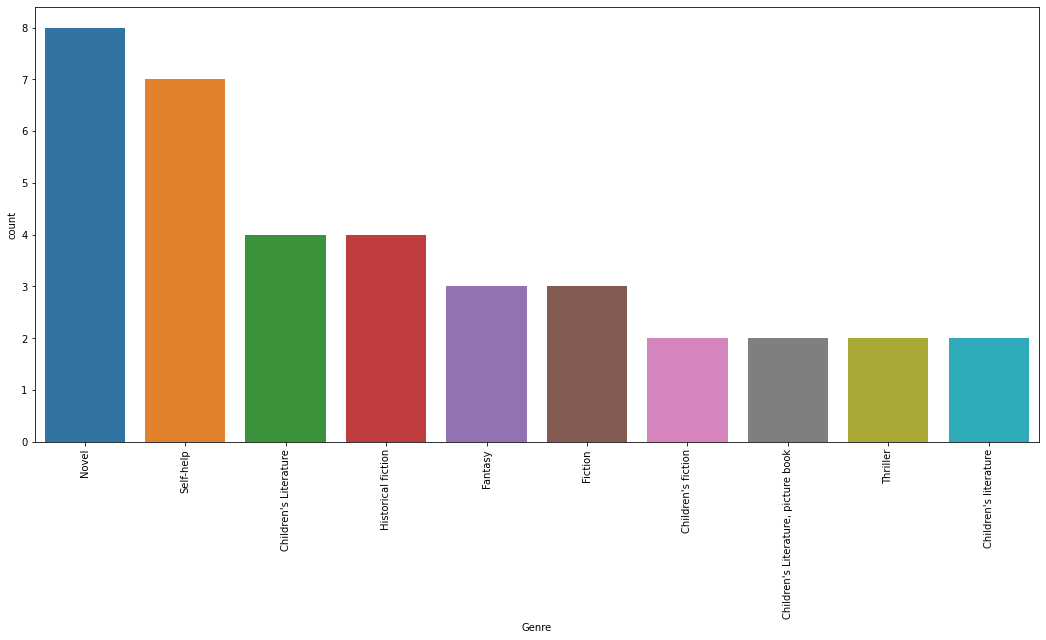

In [115]:
#after removing Harry Potter, what is the most represented genre in terms of bestsellers?

top_genres = df2['Genre'].value_counts().head(10)
top_genres = top_genres.sort_values(ascending=False) 

plt.figure(figsize=(18, 8))
sns.countplot(data=df2[df2['Genre'].isin(top_genres.index)], x='Genre', order=top_genres.index)
plt.xticks(rotation=90)
plt.show()

I stand by my assertion that Fantasy is overrepresented due to the popularity of the Harry Potter series